## Multiclass Classification: CIFAR10 small image dataset
https://keras.io/datasets/  
https://www.kaggle.com/c/cifar-10

** Dataset Information: **

Dataset of 50,000 32x32x3 color training images, labeled over 10 categories, and 10,000 test images.

** Attribute Information: **

- 32x32x3 color images
- 10 categories (airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck)

** Objective of this project **

recognizing objects from images

## Data

In [1]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
%matplotlib inline  

Using TensorFlow backend.


In [2]:
# Load Data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


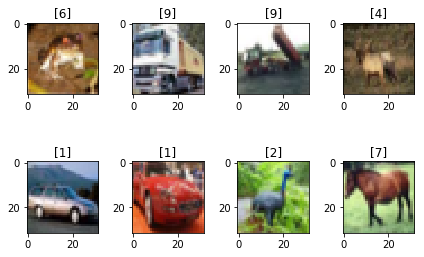

In [3]:
# plot the first 8 images
for i in range(0, 8):
    plt.subplot(240 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);
plt.tight_layout()

In [4]:
# 10 digits
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000], dtype=int64))

## CNN

#### Data Preprocessing

In [5]:
import keras.backend as K
from keras.utils.np_utils import to_categorical
K.set_image_dim_ordering('th')

seed = 101 #random seed for reproducibility
np.random.seed(seed)

# Data preprocessing
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0-1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 3, 32, 32) (50000, 10) (10000, 3, 32, 32) (10000, 10)


#### Model Train & Evaluation

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout,Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D,MaxPooling2D

np.random.seed(seed)
K.clear_session()
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(3, 32, 32), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 30, 30)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 15, 15)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 13, 13)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 6, 6)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

In [7]:
# train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=30, batch_size=32, verbose=2)

# evaluate model on train set
scores = model.evaluate(X_train,y_train,verbose=0)
print('loss of train set: {:0.3f}'.format(scores[0]))
print('accuracy of train set: {:0.1f}%'.format(scores[1]*100))
# evaluate model on test data
scores = model.evaluate(X_test,y_test,verbose=0)
print('loss of test set: {:0.3f}'.format(scores[0]))
print('accuracy of test set: {:0.1f}%'.format(scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 - 848s - loss: 1.3819 - acc: 0.5106 - val_loss: 1.0345 - val_acc: 0.6396
Epoch 2/30
 - 847s - loss: 0.8937 - acc: 0.6884 - val_loss: 0.9533 - val_acc: 0.6811
Epoch 3/30
 - 849s - loss: 0.7209 - acc: 0.7522 - val_loss: 0.7796 - val_acc: 0.7338
Epoch 4/30
 - 849s - loss: 0.6457 - acc: 0.7838 - val_loss: 0.8164 - val_acc: 0.7476
Epoch 5/30
 - 849s - loss: 0.6164 - acc: 0.7942 - val_loss: 0.8056 - val_acc: 0.7301
Epoch 6/30
 - 849s - loss: 0.5953 - acc: 0.8031 - val_loss: 0.9253 - val_acc: 0.7146
Epoch 7/30
 - 849s - loss: 0.5733 - acc: 0.8112 - val_loss: 0.9251 - val_acc: 0.7428
Epoch 8/30
 - 848s - loss: 0.5579 - acc: 0.8200 - val_loss: 0.8677 - val_acc: 0.7435
Epoch 9/30
 - 848s - loss: 0.5447 - acc: 0.8231 - val_loss: 0.9651 - val_acc: 0.7417
Epoch 10/30
 - 848s - loss: 0.5375 - acc: 0.8293 - val_loss: 1.1575 - val_acc: 0.6879
Epoch 11/30
 - 848s - loss: 0.5401 - acc: 0.8265 - val_loss: 1.0199 - val_acc: 0.6876
Epoch 12/30
 

#### Model Saving & Loading

In [8]:
# save the model
filename = 'model'
# model architecture
model_json = model.to_json()
with open(filename+'.json', 'w') as json_file:
    json_file.write(model_json)
# model weghts
model.save(filename+'.h5')
print('Saved model in',filename+'.json,',filename+'.h5')

Saved model in model.json, model.h5


In [9]:
#load model from JSON
filename = 'model'
# model architecture
from keras.models import model_from_json
json_file = open(filename+'.json', 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
# model weghts
model.load_weights(filename+'.h5')
print('Loaded model from',filename+'.json,',filename+'.h5')
print(model.summary())

Loaded model from model.json, model.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 30, 30)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 15, 15)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 13, 13)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 6, 6)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2